In [162]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

# I. data importation and wrangling

In [163]:
df = pd.read_csv('Data/final.csv')

In [164]:
print(df.shape)
df.head()

(199, 74)


,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
0,Jul-17,20980.32206,23.12607,3.44655,0.0,9653.23988,111.09914,1648.012,4371.98080,5008.53970,...,53.572,3.694,57.266,1051.503,2111.264,17.53,5.424,70676.525,24342.39981,48.016
1,Jun-17,18260.48619,26.82868,3.31392,0.0,7191.91812,118.54188,959.831,4455.83824,5388.18090,...,47.968,3.560,51.529,834.144,1890.416,17.55,6.162,52936.269,22235.30692,55.518
2,May-17,16878.55820,14.41477,3.32468,0.0,5243.68841,136.91117,840.135,4972.12223,5532.79051,...,47.874,3.679,51.553,697.129,1886.702,15.46,3.572,38705.087,19838.08134,39.540
3,Apr-17,15436.06640,19.33808,3.53045,0.0,4248.56449,129.62659,1412.868,4397.51087,5155.78836,...,48.577,3.560,52.137,613.895,1914.399,13.12,4.529,30739.269,17875.54180,43.499
4,Mar-17,16101.84657,27.06185,6.00000,0.0,4816.73759,118.23473,1569.141,4481.18059,5062.00859,...,63.788,3.679,67.466,667.123,2513.842,15.39,6.222,36072.471,19947.97958,55.854


In [62]:
# a function to modify the format of the date 
def modify_data(s):
    if len(s)==6:
        s = s[:4]+'20'+s[4:]
    else:
        s = s[:4]+'200'+s[4:]
    return(s)

In [63]:
df['Month'] = df['Month'].apply(modify_data)
df.head()

,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
0,Jul-2017,20980.32206,23.12607,3.44655,0.0,9653.23988,111.09914,1648.012,4371.98080,5008.53970,...,53.572,3.694,57.266,1051.503,2111.264,17.53,5.424,70676.525,24342.39981,48.016
1,Jun-2017,18260.48619,26.82868,3.31392,0.0,7191.91812,118.54188,959.831,4455.83824,5388.18090,...,47.968,3.560,51.529,834.144,1890.416,17.55,6.162,52936.269,22235.30692,55.518
2,May-2017,16878.55820,14.41477,3.32468,0.0,5243.68841,136.91117,840.135,4972.12223,5532.79051,...,47.874,3.679,51.553,697.129,1886.702,15.46,3.572,38705.087,19838.08134,39.540
3,Apr-2017,15436.06640,19.33808,3.53045,0.0,4248.56449,129.62659,1412.868,4397.51087,5155.78836,...,48.577,3.560,52.137,613.895,1914.399,13.12,4.529,30739.269,17875.54180,43.499
4,Mar-2017,16101.84657,27.06185,6.00000,0.0,4816.73759,118.23473,1569.141,4481.18059,5062.00859,...,63.788,3.679,67.466,667.123,2513.842,15.39,6.222,36072.471,19947.97958,55.854


In [64]:
df['Month'] = pd.to_datetime(df['Month'])

In [65]:
df.head()

,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
0,2017-07-01,20980.32206,23.12607,3.44655,0.0,9653.23988,111.09914,1648.012,4371.98080,5008.53970,...,53.572,3.694,57.266,1051.503,2111.264,17.53,5.424,70676.525,24342.39981,48.016
1,2017-06-01,18260.48619,26.82868,3.31392,0.0,7191.91812,118.54188,959.831,4455.83824,5388.18090,...,47.968,3.560,51.529,834.144,1890.416,17.55,6.162,52936.269,22235.30692,55.518
2,2017-05-01,16878.55820,14.41477,3.32468,0.0,5243.68841,136.91117,840.135,4972.12223,5532.79051,...,47.874,3.679,51.553,697.129,1886.702,15.46,3.572,38705.087,19838.08134,39.540
3,2017-04-01,15436.06640,19.33808,3.53045,0.0,4248.56449,129.62659,1412.868,4397.51087,5155.78836,...,48.577,3.560,52.137,613.895,1914.399,13.12,4.529,30739.269,17875.54180,43.499
4,2017-03-01,16101.84657,27.06185,6.00000,0.0,4816.73759,118.23473,1569.141,4481.18059,5062.00859,...,63.788,3.679,67.466,667.123,2513.842,15.39,6.222,36072.471,19947.97958,55.854


In [66]:
y = df['Average.Retail.Price.of.Electricity..Total..Cents.per.Kilowatthour...Including.Taxes.']

In [67]:
df.drop(['Month'], axis=1).columns.values

array(['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours',
       'GenCalifornia...coal.thousand.megawatthours',
       'GenCalifornia...petroleum.liquids.thousand.megawatthours',
       'GenCalifornia...petroleum.coke.thousand.megawatthours',
       'GenCalifornia...natural.gas.thousand.megawatthours',
       'GenCalifornia...other.gases.thousand.megawatthours',
       'GenCalifornia...nuclear.thousand.megawatthours',
       'GenCalifornia...conventional.hydroelectric.thousand.megawatthours',
       'GenCalifornia...other.renewables.thousand.megawatthours',
       'GenCalifornia...hydro.electric.pumped.storage.thousand.megawatthours',
       'GenCalifornia...other.thousand.megawatthours',
       'GenCalifornia..Geothermal.electricity.Total',
       'GenCalifornia..Geothermal.electric.utility',
       'GenCalifornia..Independent.Power.producers', 'GDP', 'Av.Temp',
       'Av.Daily.Max', 'Av.Rel.Humid',
       'PrCalifornia...all.sectors.cents.per.kilowatthour',
       '

# II. Feature Selection

In [68]:
from scipy.stats import pearsonr
df_new = df.drop(['Month',
                  'Average.Retail.Price.of.Electricity..Residential..Cents.per.Kilowatthour...Including.Taxes.',
                  'Average.Retail.Price.of.Electricity..Commercial..Cents.per.Kilowatthour...Including.Taxes.',
                  'Average.Retail.Price.of.Electricity..Industrial..Cents.per.Kilowatthour...Including.Taxes.',
                  'Average.Retail.Price.of.Electricity..Transportation..Cents.per.Kilowatthour...Including.Taxes.',
                  'Average.Retail.Price.of.Electricity..Total..Cents.per.Kilowatthour...Including.Taxes.'], axis=1)
Feature = df_new.columns.values
Pearson = []
for var in df_new.columns.values:
    Pearson = Pearson + [abs(pearsonr(y,df[var])[0])]
Pearson_Coef = pd.DataFrame({'Feature': Feature, 'Pearson':Pearson}) 
Pearson_Coef = Pearson_Coef[Pearson_Coef['Pearson'] >= 0.7].sort_values(ascending=False,axis=0, by = 'Pearson')
Pearson_Coef

,Feature,Pearson
28,Biofuels.Consump.TrillBTU.,0.923888
29,Total.Biomass.Consump.TrillBTU.,0.918654
19,Bio.Prod.Trillion.BTU.,0.914748
20,BioMass.Prod.Trill.BTU.,0.910235
59,Natural.Gas.Consumed.by.the.Transportation.Sec...,0.859504
14,GDP,0.849559
23,GeoConsump.TrillBtu.,0.843676
10,GenCalifornia...other.thousand.megawatthours,0.826934
30,Total.Renewable.Consump.TrillBTU.,0.816141
21,Total.RenProd..TrillBtu.,0.812076


In [69]:
list(Pearson_Coef.Feature)

['Biofuels.Consump.TrillBTU.',
 'Total.Biomass.Consump.TrillBTU.',
 'Bio.Prod.Trillion.BTU.',
 'BioMass.Prod.Trill.BTU.',
 'Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.',
 'GDP',
 'GeoConsump.TrillBtu.',
 'GenCalifornia...other.thousand.megawatthours',
 'Total.Renewable.Consump.TrillBTU.',
 'Total.RenProd..TrillBtu.',
 'WasteConsump.TrillBTU.',
 'Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.',
 'Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',
 'PrCalifornia...all.sectors.cents.per.kilowatthour',
 'Percentage.of.Industrial.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.',
 'Electricity.Imports..Billion.Kilowatthours.',
 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.',
 'WindConsump.TrillBTU.',
 'Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.',
 'GenCalifornia...petroleum.coke.thousand.megawatthour

In [70]:
df_new = df[list(Pearson_Coef.Feature)]
print(df_new.shape)
df_new.head()

(199, 22)


,Biofuels.Consump.TrillBTU.,Total.Biomass.Consump.TrillBTU.,Bio.Prod.Trillion.BTU.,BioMass.Prod.Trill.BTU.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,GDP,GeoConsump.TrillBtu.,GenCalifornia...other.thousand.megawatthours,Total.Renewable.Consump.TrillBTU.,Total.RenProd..TrillBtu.,...,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,PrCalifornia...all.sectors.cents.per.kilowatthour,Percentage.of.Industrial.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Electricity.Imports..Billion.Kilowatthours.,Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.,WindConsump.TrillBTU.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,GenCalifornia...petroleum.coke.thousand.megawatthours,Electricity.Net.Imports..Billion.Kilowatthours.,Percentage.of.Residential.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.
0,197.739,408.795,195.189,411.792,3.694,2315.0,19.407,81.38391,901.750,904.747,...,17.53,17.53,14.5,6.617,1.102,146.410,1051.503,0.0,5.758,95.8
1,198.379,401.251,190.910,400.461,3.560,2330.0,18.140,77.70546,974.558,973.768,...,17.55,17.55,14.4,5.742,1.050,181.058,834.144,0.0,4.680,94.5
2,199.780,403.032,196.188,404.818,3.679,2325.0,18.644,69.07843,1012.611,1014.398,...,15.46,15.46,13.8,5.042,1.006,208.060,697.129,0.0,4.168,95.6
3,182.924,382.849,182.462,388.275,3.560,2320.0,19.221,77.85556,982.914,988.339,...,13.12,13.12,14.5,5.470,0.903,236.731,613.895,0.0,4.271,95.3
4,190.120,404.139,195.997,416.970,3.679,2315.0,19.676,74.80253,1009.746,1022.577,...,15.39,15.39,14.9,4.823,1.045,238.556,667.123,0.0,3.637,95.7


# III. Stationnarity

## 1. Define useful stationnarity check function

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

## 2. Check if the kept features are stationnary

### a. look at the selected features

In [148]:
for var in df_new.columns.values:
    print(var)
    print('')
    adf_check(df_new[var])
    print('')
    print('###########################################################################################')
    print('')    

Biofuels.Consump.TrillBTU.

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.5898770320443912
p-value : 0.873253035702819
#Lags Used : 12
Number of Observations Used : 186
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

###########################################################################################

Total.Biomass.Consump.TrillBTU.

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.19739447211573988
p-value : 0.9388314776159304
#Lags Used : 13
Number of Observations Used : 185
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

###########################################################################################

Bio.Prod.Trillion.BTU.

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.3981333350283453
p-value : 0.9104099773581692
#Lags Used : 13
Number of Observations Used : 185
weak evidence against null hypothesis, time series has a unit root, indicat

### b. look at their first diffrences

In [152]:
df_new_diffrence = df_new

for var in df_new_diffrence.columns.values:
    
    df_new_diffrence[var + '_first_diff'] = (df_new_diffrence[var] - df_new_diffrence[var].shift(1))
    df_new_diffrence = df_new_diffrence.drop([var], axis = 1)
    print(var + '_first_diff')
    print('')
    df_new_diffrence.dropna(inplace=True)
    adf_check(df_new_diffrence[var + '_first_diff'])
    print('')
    print('###########################################################################################')
    print('')  
    
    
    

Biofuels.Consump.TrillBTU._first_diff

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.658968905950347
p-value : 0.004728740062431911
#Lags Used : 11
Number of Observations Used : 186
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

###########################################################################################

Total.Biomass.Consump.TrillBTU._first_diff

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.4182853003044142
p-value : 0.010351098400525543
#Lags Used : 12
Number of Observations Used : 184
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary

###########################################################################################

Bio.Prod.Trillion.BTU._first_diff

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.1299998216191414
p-value : 0.024411265854514603
#Lags Used : 12
Number of Observations Used : 183
strong eviden

/Users/ahmedissaoui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [57]:
import pprint
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

df.fillna(0, inplace=True)
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

scaler = StandardScaler()
X=df.drop(['Average.Retail.Price.of.Electricity..Total..Cents.per.Kilowatthour...Including.Taxes.',
          'Month'], axis=1)
y=y


names = df.drop(['Average.Retail.Price.of.Electricity..Total..Cents.per.Kilowatthour...Including.Taxes.'], axis=1).columns.values
  
lasso = Lasso(alpha=.0003)
lasso.fit(X, y)
  
pp = pprint.PrettyPrinter(indent=4)
pp.pprint (pretty_print_linear(lasso.coef_, names, sort = True))

('0.378 * Av.Rel.Humid + 0.372 * '
 'Average.Retail.Price.of.Electricity..Residential..Cents.per.Kilowatthour...Including.Taxes. '
 '+ -0.368 * Natural.Gas.Consumption..Total..Billion.Cubic.Feet. + 0.349 * '
 'Electricity.End.Use..Total..Billion.Kilowatthours. + 0.275 * '
 'Average.Retail.Price.of.Electricity..Commercial..Cents.per.Kilowatthour...Including.Taxes. '
 '+ 0.022 * Electricity.Retail.Sales..Total..Billion.Kilowatthours. + -0.013 * '
 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours. + 0.01 '
 '* Hydro.Consumption.TrillBtu. + -0.009 * '
 'Percentage.of.Residential.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent. '
 '+ -0.009 * '
 'Percentage.of.Industrial.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent. '
 '+ 0.005 * Natural.Gas.Price..Citygate..Dollars.per.Thousand.Cubic.Feet. + '
 '0.004 * Electricity.Exports..Billion.Kilowatthours. + -0.004 * '
 'Electricity.Net.Imports..Billion.Kilowatthours. + 0.004 * '
 'Natural.Gas.Pr

/Users/ahmedissaoui/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# IV. Modeling

In [71]:
## 1. Model training

In [72]:
df.index = df.Month

In [73]:
list(df.index)

[Timestamp('2017-07-01 00:00:00'),
 Timestamp('2017-06-01 00:00:00'),
 Timestamp('2017-05-01 00:00:00'),
 Timestamp('2017-04-01 00:00:00'),
 Timestamp('2017-03-01 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2016-11-01 00:00:00'),
 Timestamp('2016-10-01 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2016-08-01 00:00:00'),
 Timestamp('2016-07-01 00:00:00'),
 Timestamp('2016-06-01 00:00:00'),
 Timestamp('2016-05-01 00:00:00'),
 Timestamp('2016-04-01 00:00:00'),
 Timestamp('2016-03-01 00:00:00'),
 Timestamp('2016-02-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2015-12-01 00:00:00'),
 Timestamp('2015-11-01 00:00:00'),
 Timestamp('2015-10-01 00:00:00'),
 Timestamp('2015-09-01 00:00:00'),
 Timestamp('2015-08-01 00:00:00'),
 Timestamp('2015-07-01 00:00:00'),
 Timestamp('2015-06-01 00:00:00'),
 Timestamp('2015-05-01 00:00:00'),
 Timestamp('2015-04-01 00:00:00'),
 Timestamp('2015-03-

In [157]:
# We have seasonal data!
model = sm.tsa.statespace.SARIMAX(train['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours'],
                                  order=(1,1,1), 
                                  seasonal_order=(0,1,1,12),   
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

                                                  Statespace Model Results                                                  
Dep. Variable:     GenCalifornia...all.fuels..utility.scale..thousand.megawatthours   No. Observations:                  133
Model:                                               SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -879.546
Date:                                                              Sun, 22 Apr 2018   AIC                           1767.093
Time:                                                                      13:26:05   BIC                           1778.654
Sample:                                                                  01-01-2012   HQIC                          1771.791
                                                                       - 01-01-2001                                         
Covariance Type:                                                                opg                                         


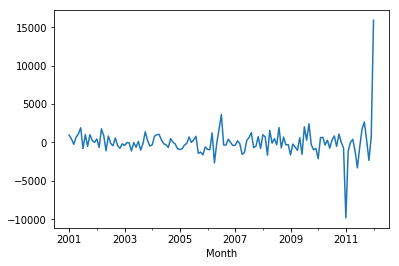

In [158]:
results.resid.plot()

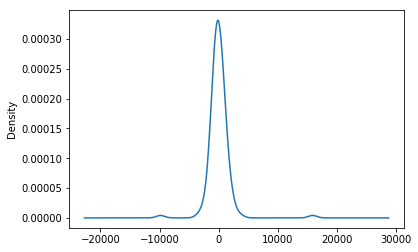

In [159]:
results.resid.plot(kind='kde')

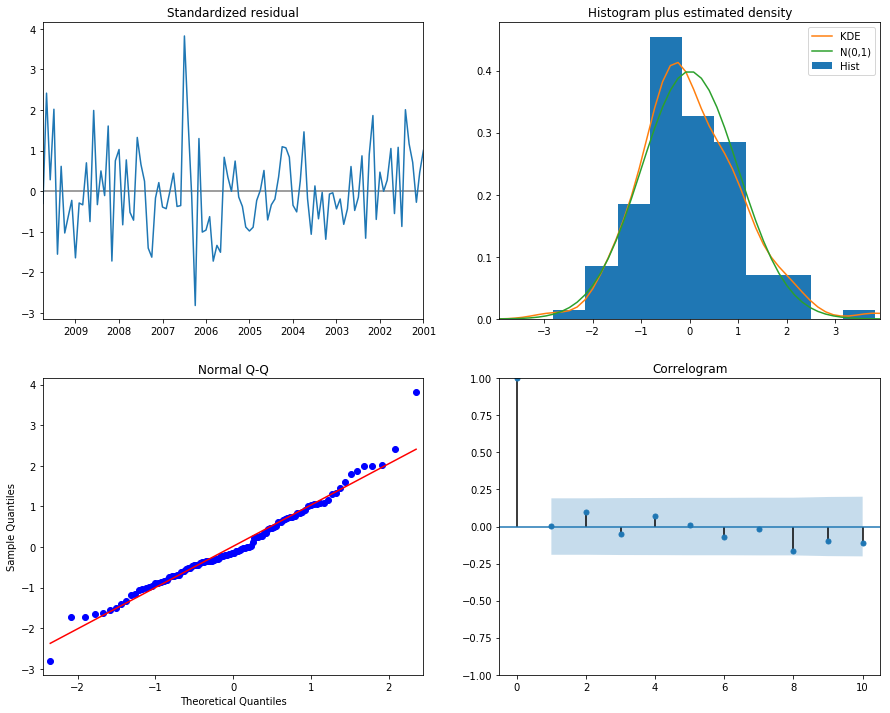

In [160]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [161]:
train

,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,prediction
Month,,
2012-01-01,15904.50090,15668.420716
2011-12-01,17704.92620,15952.882988
2011-11-01,15525.96632,15819.185542
2011-10-01,16050.12956,17644.653074
2011-09-01,18730.23678,18679.169548
2011-08-01,20258.59138,20413.144104
2011-07-01,19471.24299,19836.017219
2011-06-01,16161.55195,17187.598770
2011-05-01,15248.89137,15476.604535


In [105]:
df= df['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours']

In [107]:
df.head()

Month
2017-07-01    20980.32206
2017-06-01    18260.48619
2017-05-01    16878.55820
2017-04-01    15436.06640
2017-03-01    16101.84657
Name: GenCalifornia...all.fuels..utility.scale..thousand.megawatthours, dtype: float64

In [110]:
df.shape[0]

199

In [152]:
train = df.iloc[66:]
test  = df.iloc[0:66]

In [153]:
train.head()

,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,prediction
Month,,
2012-01-01 00:00:00,15904.50090,15668.420716
2011-12-01 00:00:00,17704.92620,15952.882988
2011-11-01 00:00:00,15525.96632,15819.185542
2011-10-01 00:00:00,16050.12956,17644.653074
2011-09-01 00:00:00,18730.23678,18679.169548


In [154]:
train.tail()

,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,prediction
Month,,
2001-05-01 00:00:00,16874.504,15610.225170
2001-04-01 00:00:00,15841.018,14998.779966
2001-03-01 00:00:00,15848.633,16053.738758
2001-02-01 00:00:00,14380.392,13730.643660
2001-01-01 00:00:00,16618.887,15463.256690


In [155]:
test.head()

,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,prediction
Month,,
2017-07-01 00:00:00,20980.32206,0.000000
2017-06-01 00:00:00,18260.48619,22815.368369
2017-05-01 00:00:00,16878.55820,19051.037754
2017-04-01 00:00:00,15436.06640,17169.491891
2017-03-01 00:00:00,16101.84657,15574.454236


In [156]:
test.tail()

,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,prediction
Month,,
2012-06-01 00:00:00,16375.63729,17104.710955
2012-05-01 00:00:00,15954.16540,15319.706307
2012-04-01 00:00:00,14506.21643,14583.999788
2012-03-01 00:00:00,14993.48861,14146.667379
2012-02-01 00:00:00,14595.20325,13750.062022


In [132]:
prediction =[]

for i in range(test.shape[0] -1):
    pred = results.predict(start = i, end = i, dynamic=False)
    prediction.append(pred[0])

df = pd.DataFrame(df)
df['prediction'] = prediction
df.head()

,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,prediction
Month,,
2017-07-01 00:00:00,20980.3,0.000000
2017-06-01 00:00:00,18260.5,22815.368369
2017-05-01 00:00:00,16878.6,19051.037754
2017-04-01 00:00:00,15436.1,17169.491891
2017-03-01 00:00:00,16101.8,15574.454236


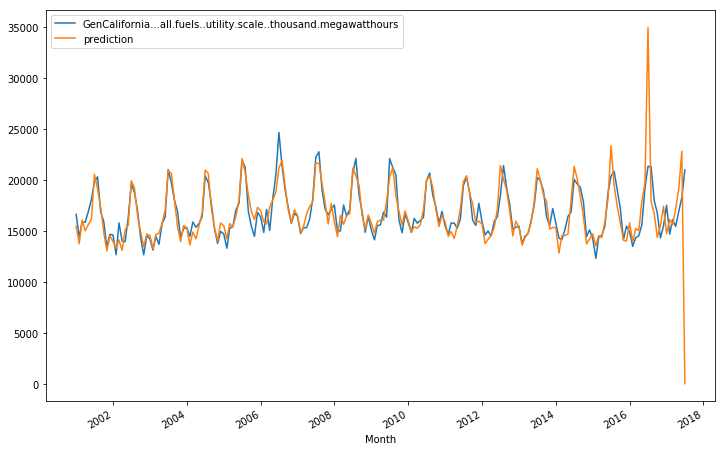

In [148]:
df[['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours','prediction']].plot(figsize=(12,8))


In [143]:
df.drop(df.index[[199]], inplace= True)

In [145]:
df['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours'][198]

16618.887

In [146]:
df[['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours']] = df[['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours']].apply(pd.to_numeric)

In [135]:
df.columns

Index(['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours', 'prediction'], dtype='object')

In [22]:
from pandas.tseries.offsets import DateOffset

In [23]:
future_dates = [df.index[1] + DateOffset(months=x) for x in range(0,24) ]

In [24]:
future_dates

[Timestamp('2017-06-01 00:00:00'),
 Timestamp('2017-07-01 00:00:00'),
 Timestamp('2017-08-01 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2017-10-01 00:00:00'),
 Timestamp('2017-11-01 00:00:00'),
 Timestamp('2017-12-01 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00')]

In [25]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [26]:
future_df = pd.concat([df,future_dates_df])

In [27]:
future_df.head()

,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
2017-07-01,2017-07-01,20980.32206,23.12607,3.44655,0.0,9653.23988,111.09914,1648.012,4371.98080,5008.53970,...,53.572,3.694,57.266,1051.503,2111.264,17.53,5.424,70676.525,24342.39981,48.016
2017-06-01,2017-06-01,18260.48619,26.82868,3.31392,0.0,7191.91812,118.54188,959.831,4455.83824,5388.18090,...,47.968,3.560,51.529,834.144,1890.416,17.55,6.162,52936.269,22235.30692,55.518
2017-05-01,2017-05-01,16878.55820,14.41477,3.32468,0.0,5243.68841,136.91117,840.135,4972.12223,5532.79051,...,47.874,3.679,51.553,697.129,1886.702,15.46,3.572,38705.087,19838.08134,39.540
2017-04-01,2017-04-01,15436.06640,19.33808,3.53045,0.0,4248.56449,129.62659,1412.868,4397.51087,5155.78836,...,48.577,3.560,52.137,613.895,1914.399,13.12,4.529,30739.269,17875.54180,43.499
2017-03-01,2017-03-01,16101.84657,27.06185,6.00000,0.0,4816.73759,118.23473,1569.141,4481.18059,5062.00859,...,63.788,3.679,67.466,667.123,2513.842,15.39,6.222,36072.471,19947.97958,55.854


In [28]:
future_df.tail()

,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
2019-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df = df['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours']

In [38]:
df.head()

Month
2017-07-01    20980.32206
2017-06-01    18260.48619
2017-05-01    16878.55820
2017-04-01    15436.06640
2017-03-01    16101.84657
Name: GenCalifornia...all.fuels..utility.scale..thousand.megawatthours, dtype: float64

In [57]:
df['forecast'] = results.forcast(start = '2015-07-01', end='2017-07-01', dynamic= True)  
df[['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours','forecast']].plot(figsize=(12,8))

AttributeError: 'SARIMAXResults' object has no attribute 'forcast'